# Run the whole deltas algorithm

In [6]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pipeline
import pipeline_old
import deltas

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data and classifier

clf


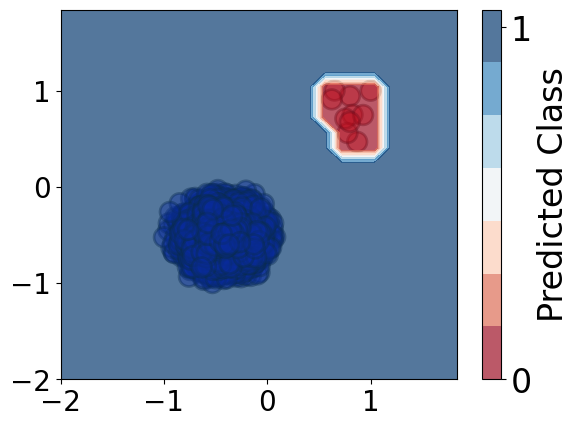

SMOTE


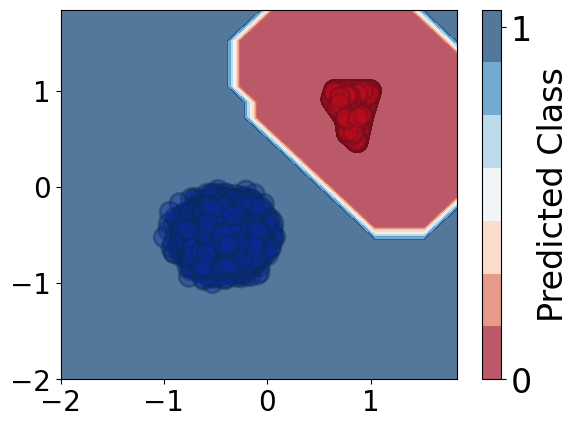

In [7]:
N1 = 10000
N2 = 10
# model = 'SVM'
model = 'Linear'
data_clf = pipeline.get_data(N1=N1, N2=N2)
data_clf['clf'], clf_SMOTE = pipeline.get_classifier(
    data_clf=data_clf,
    model='SVM-rbf',
    balance_clf=False,
    _plot=True)

data = data_clf['data']
clf = data_clf['clf']
m1 = data_clf['mean1']
m2 = data_clf['mean2']

## Get projection and data we need (R, D, M etc.)

R1 empirical: 0.04638215581151839
R2 empirical: 0.2334590352032777


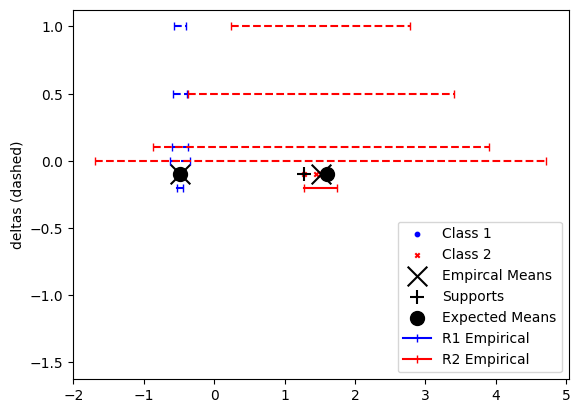

In [8]:
data_info = pipeline_old.data_project_and_info(
    data=data_clf['data'], m1=data_clf['mean1'], m2=data_clf['mean2'], clf=data_clf['clf'], data_test=data_clf['data_test'])

## set up extra parameters

In [10]:
# Costs
data_info['c1'] = 1
data_info['c2'] = 1
pipeline_old.print_params(data_info)

Parameters
        R:  1.6416144065003773
        N1: 10000
        N2: 10000
        R1: 0.04638215581151839
        R2: 0.2334590352032777
        M:  1.7633476322782395
        D:  2.000434834358849
        C1: 1
        C2: 1


## Optimiser

deltas init: [1, 0.4571630791616515]
eq. 7 can be satisfied: True
constraint init: True
Grid Search Optimisation Complete
    delta1 : 0.005005005005006 
    delta2: 0.5172499605764896
    constraint satisfied: True


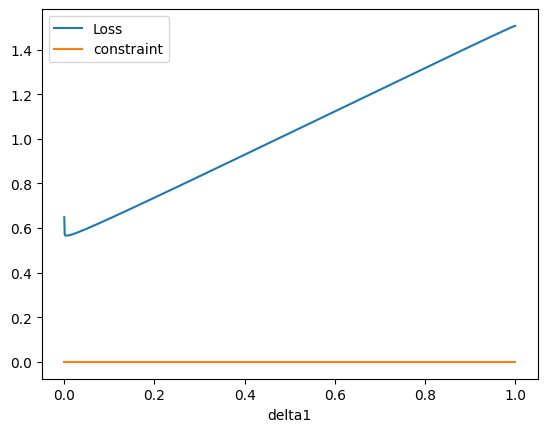

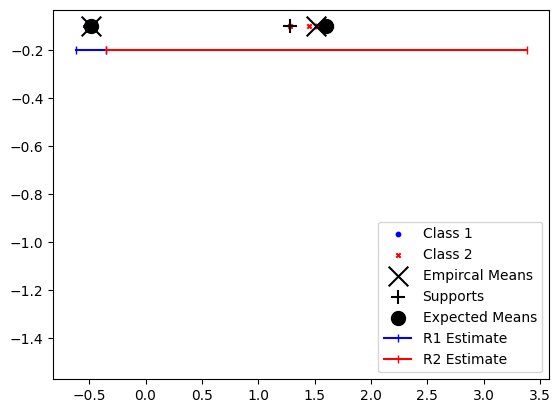

In [11]:

loss_func = deltas.scipy_optim_func   # returns tuple for (loss_func, gradient)
loss_func = deltas.loss_one_delta   # loss_func only - won't use gradient during optimisation

contraint_func = deltas.contraint_eq7
# contraint_func = deltas.contraint_eq8

delta1_from_delta2_func = deltas.delta2_given_delta1_matt
 
delta1, delta2 = pipeline_old.optimise(
    data_info, loss_func, contraint_func, delta1_from_delta2_func, grid_search=True)

# Evaluation on test data

original accuracy: 0.97415
deltas   accuracy: 0.99995


original F1: 0.9734640455781963
deltas   F1: 0.999950002499875


original precision: 1.0
deltas   precision: 0.9999000099990001




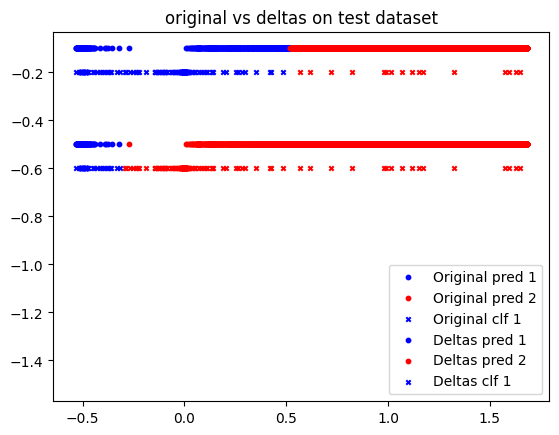

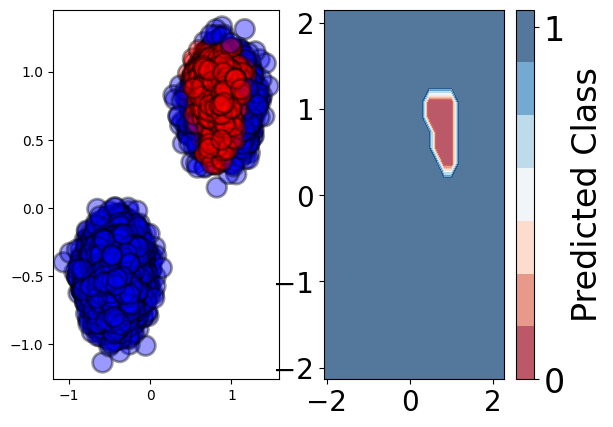

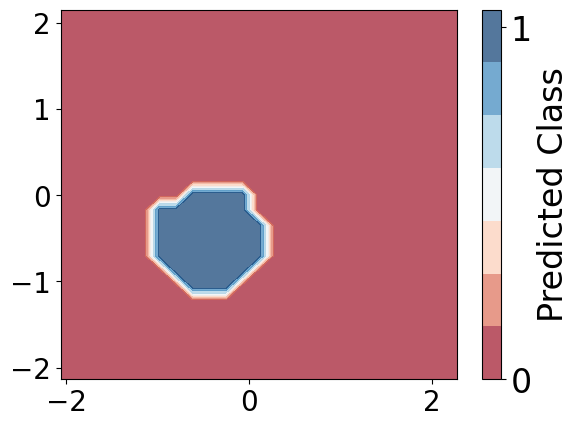

In [12]:
pipeline_old.eval_test(data_clf, data_info, delta1, delta2)